In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
data = pd.read_csv("C:\\Users\\savita\\Downloads\\mental_health_social_media_dataset.csv")
data.head()

,person_name,age,date,gender,platform,daily_screen_time_min,social_media_time_min,negative_interactions_count,positive_interactions_count,sleep_hours,physical_activity_min,anxiety_level,stress_level,mood_level,mental_state
0,Reyansh Ghosh,35,1/1/2024,Male,Instagram,320,160,1,2,7.4,28,2,7,6,Stressed
1,Neha Patel,24,1/12/2024,Female,Instagram,453,226,1,3,6.7,15,3,8,5,Stressed
2,Ananya Naidu,26,1/6/2024,Male,Snapchat,357,196,1,2,7.2,24,3,7,6,Stressed
3,Neha Das,66,1/17/2024,Female,Snapchat,190,105,0,1,8.0,41,2,6,6,Stressed
4,Reyansh Banerjee,31,1/28/2024,Male,Snapchat,383,211,1,2,7.1,22,3,7,6,Stressed


In [3]:
print(f' Shape of Dataset : {data.shape}','\n')
print(f'Information of Dataset : {data.info()}')

 Shape of Dataset : (5000, 15) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   person_name                  5000 non-null   object 
 1   age                          5000 non-null   int64  
 2   date                         5000 non-null   object 
 3   gender                       5000 non-null   object 
 4   platform                     5000 non-null   object 
 5   daily_screen_time_min        5000 non-null   int64  
 6   social_media_time_min        5000 non-null   int64  
 7   negative_interactions_count  5000 non-null   int64  
 8   positive_interactions_count  5000 non-null   int64  
 9   sleep_hours                  5000 non-null   float64
 10  physical_activity_min        5000 non-null   int64  
 11  anxiety_level                5000 non-null   int64  
 12  stress_level                 5000 non-null 

In [4]:
data.isnull().sum()

person_name                    0
age                            0
date                           0
gender                         0
platform                       0
daily_screen_time_min          0
social_media_time_min          0
negative_interactions_count    0
positive_interactions_count    0
sleep_hours                    0
physical_activity_min          0
anxiety_level                  0
stress_level                   0
mood_level                     0
mental_state                   0
dtype: int64

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5000.0,29.94780,12.279936,13.0,21.0,27.0,35.25,69.0
daily_screen_time_min,5000.0,373.05820,106.003916,140.0,310.0,388.0,461.00,520.0
social_media_time_min,5000.0,175.33160,71.209329,35.0,118.0,170.0,231.00,338.0
negative_interactions_count,5000.0,0.86420,0.555176,0.0,1.0,1.0,1.00,2.0
positive_interactions_count,5000.0,1.83540,0.943443,0.0,1.0,2.0,2.00,4.0
sleep_hours,5000.0,7.13466,0.533184,6.4,6.7,7.1,7.45,8.3
physical_activity_min,5000.0,22.69340,10.602862,8.0,14.0,21.0,29.00,46.0
anxiety_level,5000.0,2.51040,0.794996,1.0,2.0,3.0,3.00,4.0
stress_level,5000.0,7.10760,1.062378,5.0,6.0,7.0,8.00,9.0
mood_level,5000.0,5.62580,0.759928,4.0,5.0,6.0,6.00,7.0


In [6]:
data.duplicated().sum()

np.int64(0)

In [7]:
corr = data.corr(numeric_only=True)
print("\n----- CORRELATION (top pairs) -----")
corr_unstack = corr.abs().unstack().reset_index()
corr_unstack.columns = ['var1','var2','abs_corr']
corr_unstack = corr_unstack[corr_unstack['var1'] != corr_unstack['var2']]
corr_unstack = corr_unstack.sort_values('abs_corr', ascending=False).drop_duplicates(subset=['abs_corr'])
display(corr_unstack.head(12))


----- CORRELATION (top pairs) -----


,var1,var2,abs_corr
16,daily_screen_time_min,physical_activity_min,0.999627
51,sleep_hours,daily_screen_time_min,0.998553
65,physical_activity_min,sleep_hours,0.998057
98,mood_level,stress_level,0.935536
97,mood_level,anxiety_level,0.903629
78,anxiety_level,stress_level,0.899888
27,social_media_time_min,anxiety_level,0.896964
82,stress_level,social_media_time_min,0.882873
29,social_media_time_min,mood_level,0.867213
1,age,daily_screen_time_min,0.867197


In [8]:
data['date'] = pd.to_datetime(data['date'])

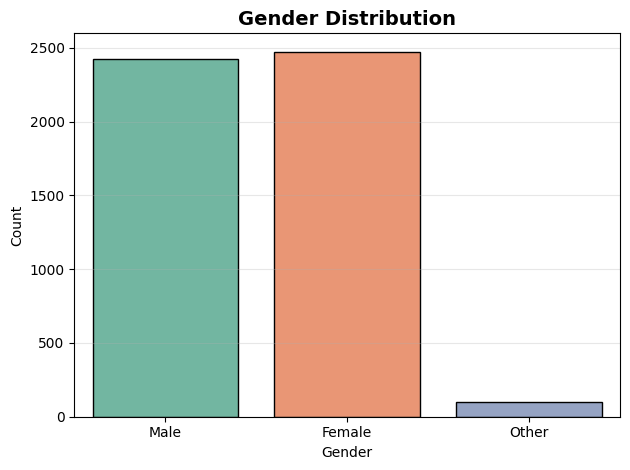

In [9]:
sns.countplot(data=data, x='gender',palette="Set2",edgecolor="black")
plt.title("Gender Distribution", fontsize=14, fontweight="bold")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


In [10]:
data['platform'].value_counts()

platform
Facebook     744
TikTok       723
YouTube      716
WhatsApp     710
Snapchat     705
Instagram    703
Twitter      699
Name: count, dtype: int64

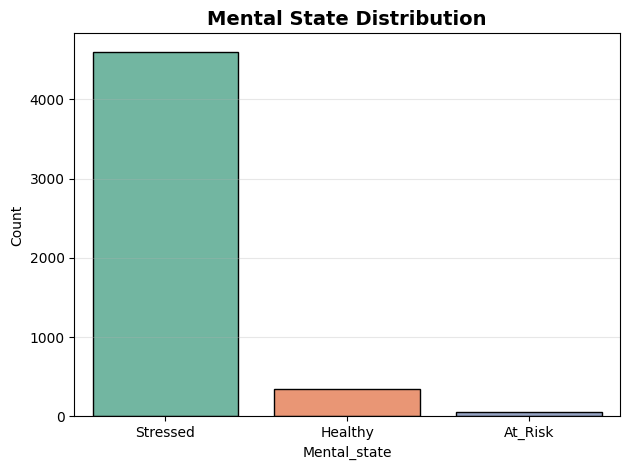

In [11]:
sns.countplot(data=data, x='mental_state',palette="Set2",edgecolor="black")
plt.title("Mental State Distribution", fontsize=14, fontweight="bold")
plt.xlabel("Mental_state")
plt.ylabel("Count")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


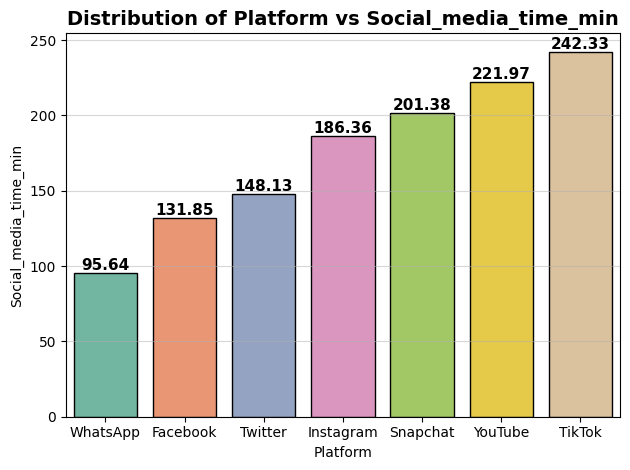

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

def add_counts(ax):
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.2f}",
        (p.get_x() + p.get_width()/2, p.get_height()),
        ha="center", va="bottom", fontsize=11, fontweight="bold"
    )

order = data.groupby('platform')['social_media_time_min'].mean().sort_values().index

ax = sns.barplot(
    data=data,
    x='platform',
    y='social_media_time_min',
    palette="Set2",
    edgecolor="black",
    errorbar=None,
    order=order  
)
add_counts(ax)
plt.title("Distribution of Platform vs Social_media_time_min", fontsize=14, fontweight="bold")
plt.xlabel("Platform")
plt.ylabel("Social_media_time_min")
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

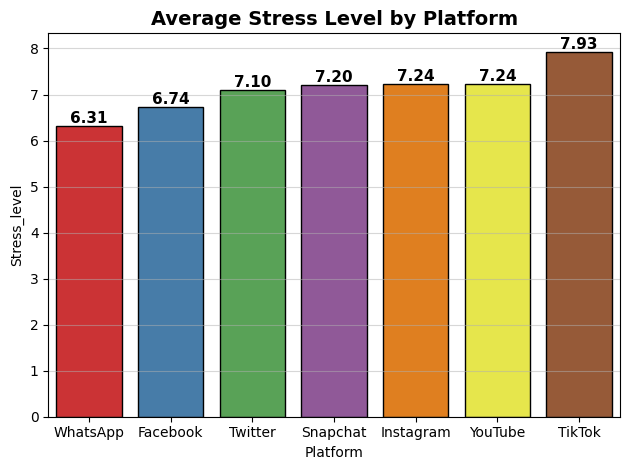

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

def add_counts(ax):
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.2f}",
        (p.get_x() + p.get_width()/2, p.get_height()),
        ha="center", va="bottom", fontsize=11, fontweight="bold"
    )

order = data.groupby('platform')['stress_level'].mean().sort_values().index

ax = sns.barplot(
    data=data,
    x='platform',
    y='stress_level',
    palette="Set1",
    edgecolor="black",
    errorbar=None,
    order=order
)
add_counts(ax)

plt.title("Average Stress Level by Platform", fontsize=14, fontweight="bold")
plt.xlabel("Platform")
plt.ylabel("Stress_level")
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

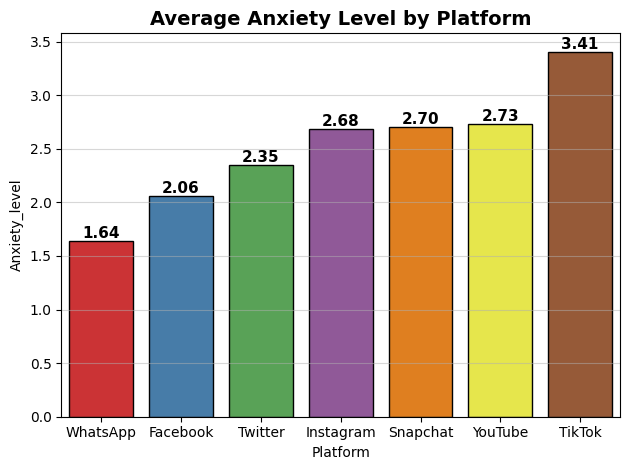

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

def add_counts(ax):
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.2f}",
        (p.get_x() + p.get_width()/2, p.get_height()),
        ha="center", va="bottom", fontsize=11, fontweight="bold"
    )

order = data.groupby('platform')['anxiety_level'].mean().sort_values().index

ax = sns.barplot(
    data=data,
    x='platform',
    y='anxiety_level',
    palette="Set1",
    edgecolor="black",
    errorbar=None,
    order=order
)
add_counts(ax)

plt.title("Average Anxiety Level by Platform", fontsize=14, fontweight="bold")
plt.xlabel("Platform")
plt.ylabel("Anxiety_level")
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

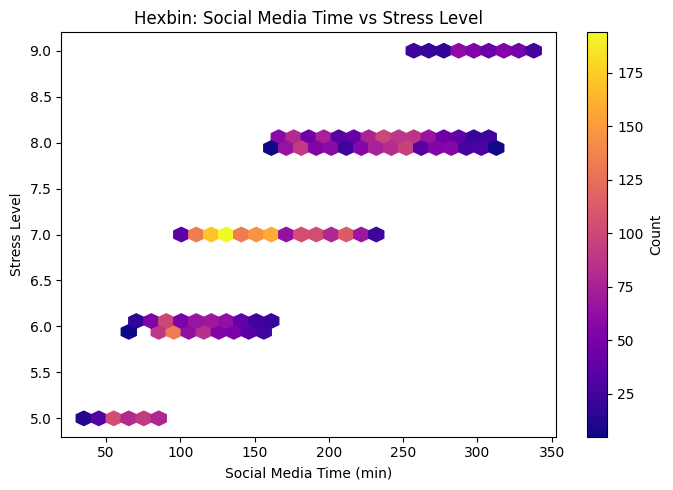

In [15]:
plt.figure(figsize=(7,5))

plt.hexbin(
    data["social_media_time_min"],
    data["stress_level"],
    gridsize=30,
    cmap="plasma",
    mincnt=1
)

plt.colorbar(label="Count")
plt.title("Hexbin: Social Media Time vs Stress Level")
plt.xlabel("Social Media Time (min)")
plt.ylabel("Stress Level")
plt.tight_layout()
plt.show()

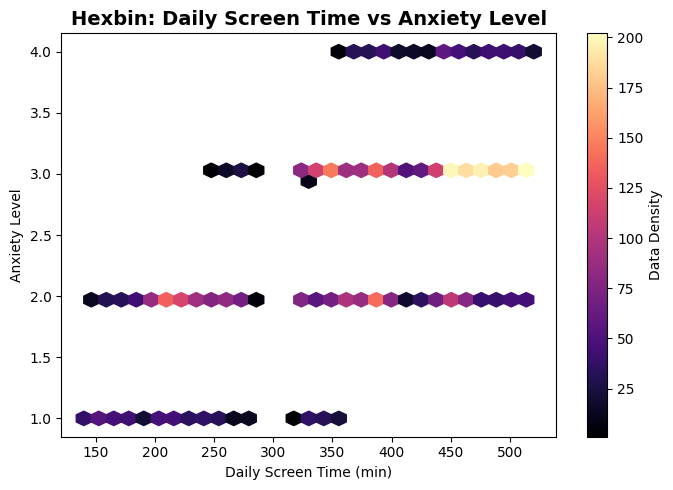

In [16]:
plt.figure(figsize=(7,5))

plt.hexbin(
    data["daily_screen_time_min"],
    data["anxiety_level"],
    gridsize=30,
    cmap="magma",
    mincnt=1
)

plt.colorbar(label="Data Density")
plt.title("Hexbin: Daily Screen Time vs Anxiety Level", fontsize=14, weight='bold')
plt.xlabel("Daily Screen Time (min)")
plt.ylabel("Anxiety Level")
plt.tight_layout()
plt.show()

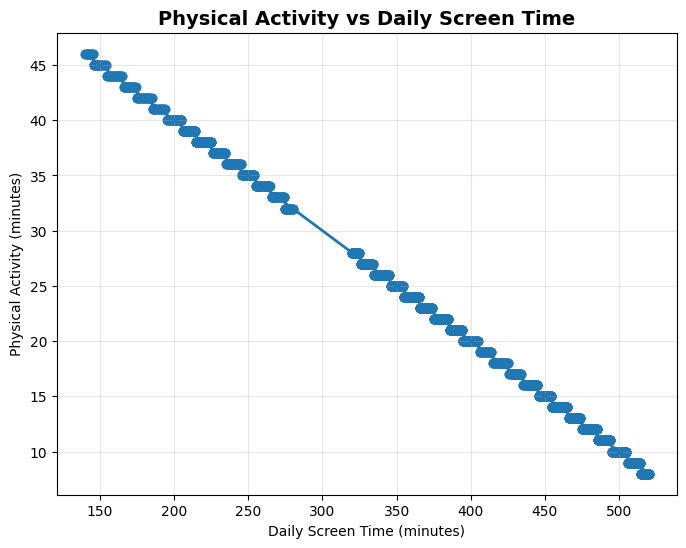

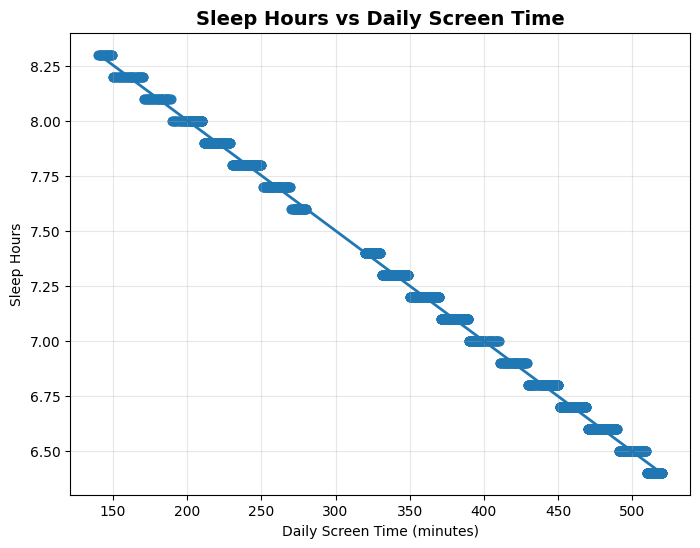

In [17]:
plt.figure(figsize=(8,6))
sns.regplot(
    data=data,
    x='daily_screen_time_min',
    y='physical_activity_min',
    scatter_kws={'alpha':0.5},
    line_kws={'linewidth':2}
)
plt.title("Physical Activity vs Daily Screen Time", fontsize=14, fontweight='bold')
plt.xlabel("Daily Screen Time (minutes)")
plt.ylabel("Physical Activity (minutes)")
plt.grid(True, alpha=0.3)
plt.show()

# Sleep hours vs Screen time
plt.figure(figsize=(8,6))
sns.regplot(
    data=data,
    x='daily_screen_time_min',
    y='sleep_hours',
    scatter_kws={'alpha':0.5},
    line_kws={'linewidth':2}
)
plt.title("Sleep Hours vs Daily Screen Time", fontsize=14, fontweight='bold')
plt.xlabel("Daily Screen Time (minutes)")
plt.ylabel("Sleep Hours")
plt.grid(True, alpha=0.3)
plt.show()

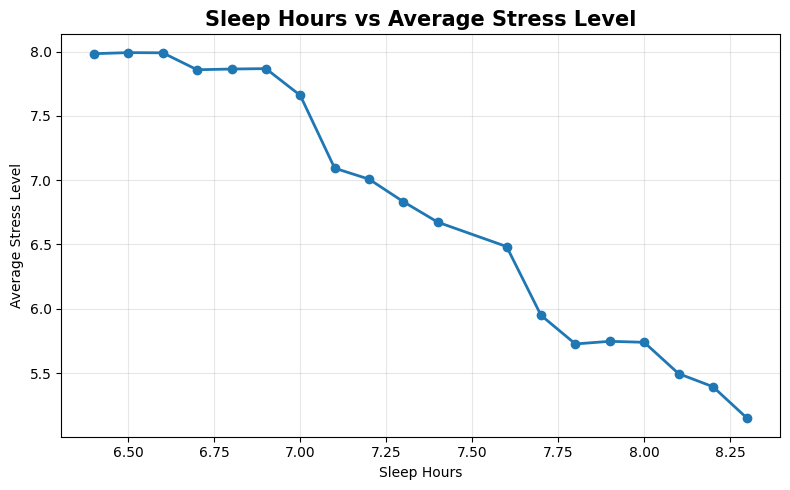

In [18]:
# Sleep & Stress Relationship
sleep_stress = data.groupby("sleep_hours")["stress_level"].mean().reset_index()

plt.figure(figsize=(8,5))
plt.plot(
    sleep_stress["sleep_hours"],
    sleep_stress["stress_level"],
    marker="o",
    linestyle="-",
    linewidth=2
)

plt.title("Sleep Hours vs Average Stress Level", fontsize=15, fontweight="bold")
plt.xlabel("Sleep Hours")
plt.ylabel("Average Stress Level")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

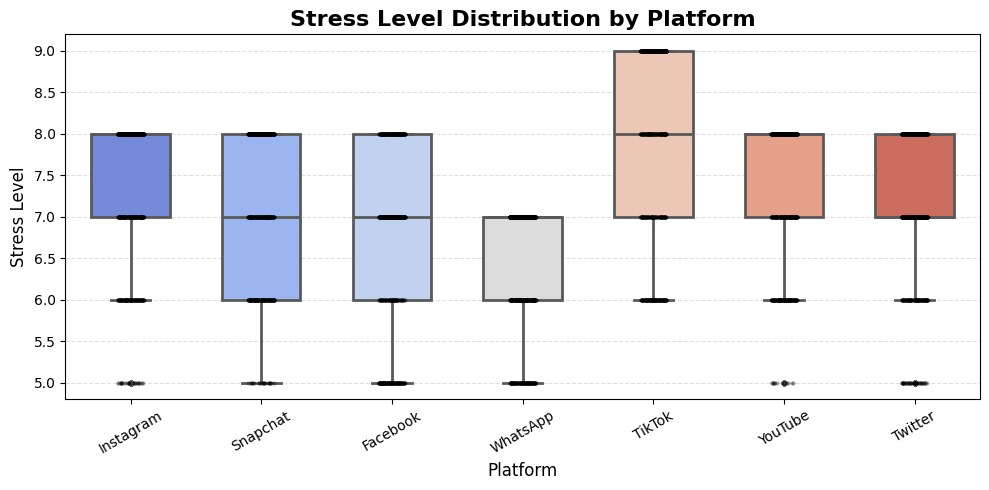

In [19]:
plt.figure(figsize=(10,5))

sns.boxplot(
    data=data,
    x="platform",
    y="stress_level",
    palette="coolwarm",
    width=0.6,
    linewidth=2,
    fliersize=3
)

sns.stripplot(
    data=data,
    x="platform",
    y="stress_level",
    color="black",
    alpha=0.3,
    size=3
)

plt.title("Stress Level Distribution by Platform", fontsize=16, weight='bold')
plt.xlabel("Platform", fontsize=12)
plt.ylabel("Stress Level", fontsize=12)
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()

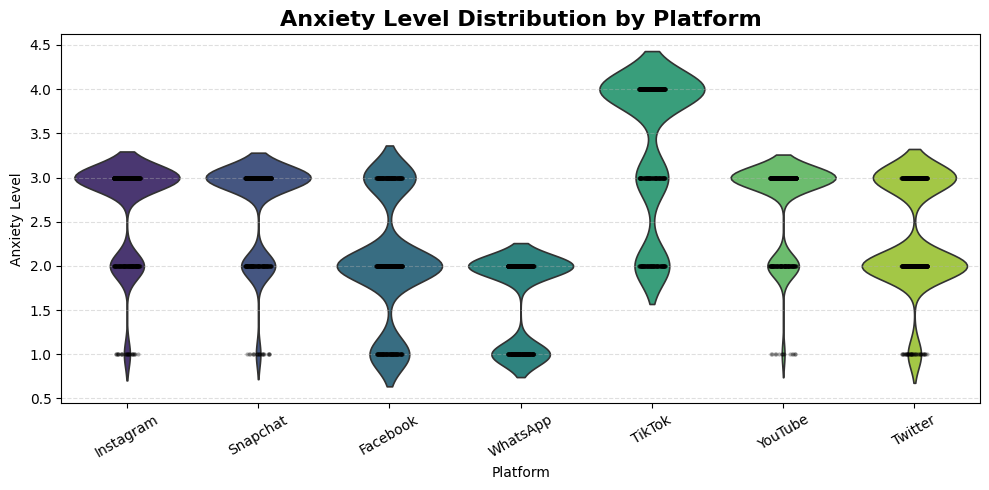

In [20]:
plt.figure(figsize=(10,5))

sns.violinplot(
    data=data,
    x="platform",
    y="anxiety_level",
    palette="viridis",
    inner=None,
    linewidth=1.2
)

sns.stripplot(
    data=data,
    x="platform",
    y="anxiety_level",
    color="black",
    alpha=0.30,
    size=3
)

plt.title("Anxiety Level Distribution by Platform", fontsize=16, weight='bold')
plt.xlabel("Platform")
plt.ylabel("Anxiety Level")
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Correlation Matrix (Numeric Features)')

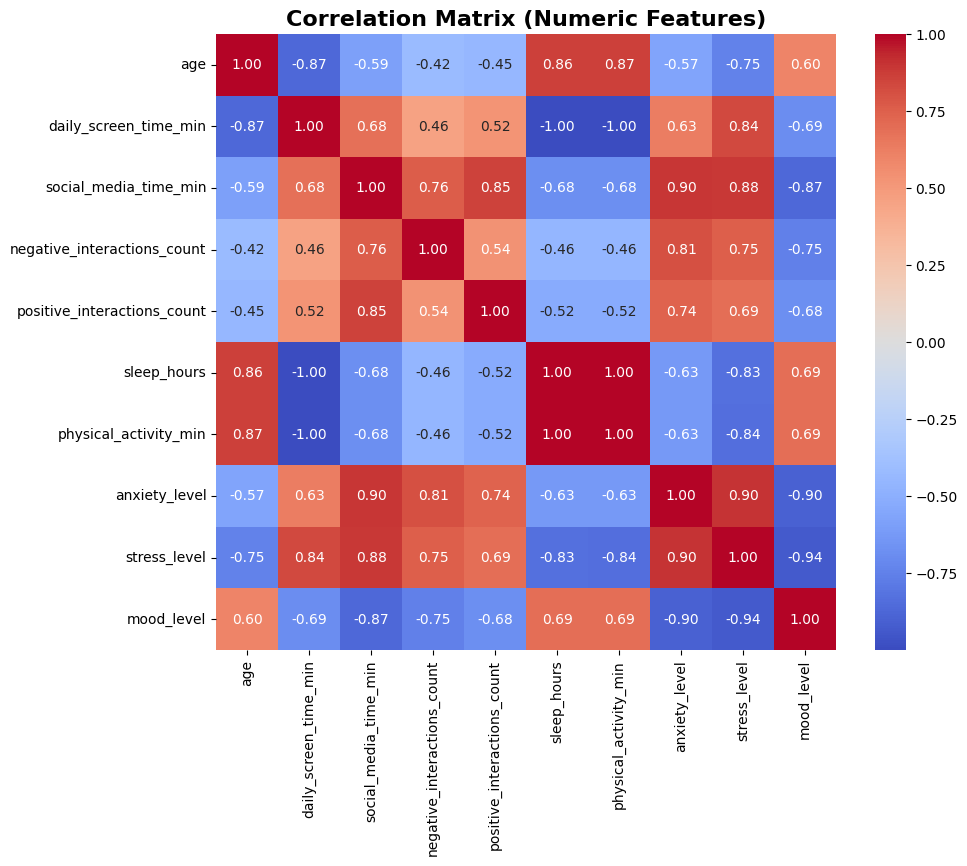

In [21]:
plt.figure(figsize=(10,8))
correlation_map = data.corr(numeric_only=True)
sns.heatmap(correlation_map, annot=True, fmt='.2f', cmap="coolwarm" )
plt.title("Correlation Matrix (Numeric Features)", fontsize=16, weight="bold")


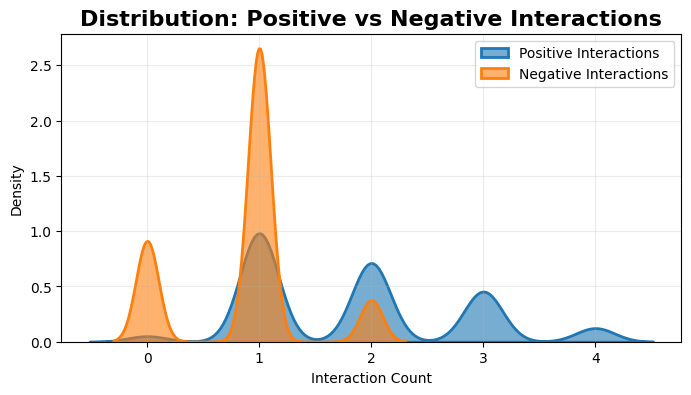

In [22]:
# positive interactions vs negative interactions
plt.figure(figsize=(8,4))

sns.kdeplot(data["positive_interactions_count"], fill=True, linewidth=2, alpha=0.6, label="Positive Interactions")
sns.kdeplot(data["negative_interactions_count"], fill=True, linewidth=2, alpha=0.6, label="Negative Interactions")

plt.title("Distribution: Positive vs Negative Interactions", fontsize=16, weight="bold")
plt.xlabel("Interaction Count")
plt.ylabel("Density")
plt.legend()
plt.grid(alpha=0.25)
plt.show()

In [23]:
# Assuming your dataframe is named df
top_10_name = (
    pd.pivot_table(
        data,
        index='person_name',
        columns='platform',
        values='daily_screen_time_min',
        aggfunc='mean'  
    ).sort_values(by='Instagram',ascending=False)  
)

top_10_name.head(10)

platform,Facebook,Instagram,Snapchat,TikTok,Twitter,WhatsApp,YouTube
person_name,,,,,,,
Navya Mishra,NaN,520.0,NaN,NaN,385.000000,443.0,359.0
Suhani Patel,333.25,519.0,NaN,NaN,349.000000,413.5,445.0
Navya Iyer,317.00,518.0,NaN,483.0,451.000000,NaN,NaN
Reyansh Chauhan,NaN,518.0,NaN,234.0,NaN,NaN,NaN
Saanvi Deshmukh,NaN,517.0,351.500000,NaN,514.000000,352.0,NaN
Kavya Shetty,400.00,517.0,287.333333,202.0,NaN,426.0,331.0
Aarohi Patil,NaN,517.0,382.000000,NaN,346.333333,386.0,NaN
Aarav Sharma,215.00,517.0,NaN,454.0,493.000000,287.5,502.0
Avni Ansari,NaN,516.0,360.000000,212.0,NaN,393.0,285.5


In [24]:
top_10_name = pd.pivot_table(
    data,
    index='person_name',
    columns='platform',
    values='daily_screen_time_min',
    aggfunc='sum'
)

top_10_name.sort_values(by='YouTube', ascending=False).head(10)

platform,Facebook,Instagram,Snapchat,TikTok,Twitter,WhatsApp,YouTube
person_name,,,,,,,
Aditi Chauhan,205.0,454.0,322.0,NaN,NaN,NaN,1718.0
Avni Deshmukh,NaN,461.0,NaN,NaN,NaN,459.0,1569.0
Suhani Ansari,468.0,461.0,217.0,170.0,228.0,260.0,1448.0
Aarohi Rawat,385.0,435.0,355.0,197.0,990.0,NaN,1441.0
Ishaan Patel,382.0,454.0,NaN,870.0,806.0,NaN,1405.0
Arjun Reddy,NaN,495.0,NaN,530.0,NaN,485.0,1402.0
Aditi Mishra,461.0,707.0,266.0,448.0,NaN,1304.0,1400.0
Isha Iyer,NaN,NaN,NaN,462.0,NaN,231.0,1394.0
Aditya Sharma,1923.0,478.0,NaN,229.0,801.0,NaN,1356.0


In [25]:
top_10_name = pd.pivot_table(
    data,
    index='person_name',
    columns='platform',
    values='daily_screen_time_min',
    aggfunc='sum'
)

top_10_name.sort_values(by='TikTok', ascending=False).head(10)

platform,Facebook,Instagram,Snapchat,TikTok,Twitter,WhatsApp,YouTube
person_name,,,,,,,
Avni Saxena,149.0,349.0,NaN,1919.0,824.0,191.0,413.0
Suhani Kale,NaN,NaN,NaN,1907.0,NaN,NaN,NaN
Diya Iyer,NaN,NaN,NaN,1696.0,NaN,441.0,NaN
Aadhya Reddy,387.0,844.0,NaN,1696.0,NaN,330.0,507.0
Diya Banerjee,NaN,482.0,1382.0,1692.0,350.0,NaN,450.0
Anika Chauhan,678.0,477.0,NaN,1544.0,379.0,1305.0,620.0
Kavya Verma,NaN,207.0,NaN,1473.0,449.0,NaN,255.0
Suhani Das,NaN,358.0,900.0,1449.0,932.0,230.0,721.0
Aditi Shinde,161.0,400.0,518.0,1433.0,471.0,173.0,NaN


In [26]:
category = data.select_dtypes(include='object').columns

le = LabelEncoder()
for cols in category:
    data[cols] = le.fit_transform(data[cols])

In [27]:
X = data.drop(columns=['mental_state', 'person_name','date','gender','negative_interactions_count'], axis=1)
y = data['mental_state']

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [28]:
scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.fit_transform(x_test)


In [64]:
model = RandomForestClassifier(n_estimators=400, min_samples_split = 10, max_depth = 20, random_state=42)
model.fit(x_train_scaler, y_train)

y_pred = model.predict(x_test_scaler)


In [65]:
display(f"Accuracy Score : {accuracy_score(y_test, y_pred)}")

'Accuracy Score : 0.999'

Text(0.5, 1.0, 'Correlation Heatmap of Final Model Prediction')

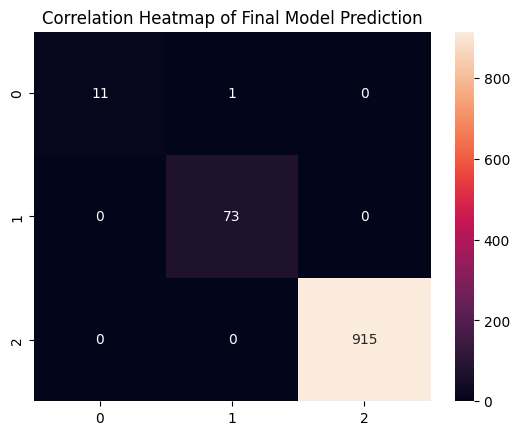

In [66]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Correlation Heatmap of Final Model Prediction')

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.99      1.00      0.99        73
           2       1.00      1.00      1.00       915

    accuracy                           1.00      1000
   macro avg       1.00      0.97      0.98      1000
weighted avg       1.00      1.00      1.00      1000



In [68]:
# feature importance
importances = model.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance.head(10))

                       Feature  Importance
8                 stress_level    0.348464
9                   mood_level    0.168934
7                anxiety_level    0.124490
3        social_media_time_min    0.113859
2        daily_screen_time_min    0.107324
6        physical_activity_min    0.068914
5                  sleep_hours    0.036362
0                          age    0.014738
4  positive_interactions_count    0.012247
1                     platform    0.004667
